In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

## Distribution des récidives réelles

Le score de récidive théorique

### Distribution globale

In [78]:
file_path = 'data/clean_data.csv' 
df = pd.read_csv(file_path)
column_names = df.columns.tolist()
column_names

['id',
 'name',
 'sex',
 'dob',
 'age',
 'age_cat',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_jail_in',
 'c_jail_out',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc',
 'is_recid',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'is_violent_recid',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'score_text',
 'screening_date',
 'v_decile_score',
 'v_score_text',
 'priors_count.1',
 'event']

In [79]:
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['duration'] = abs((df['c_jail_out'] - df['c_jail_in']).dt.days) + 0.5
df['duration'] = df['duration'].fillna(0)
# df['duration'] = df['duration'].astype('int')
df = df[df['is_recid'] != -1]
df = df[df['c_charge_degree'] != '(X)']
df_glob = df.drop(['id', 'c_jail_in', 'c_jail_out', 'dob', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'days_b_screening_arrest', 'c_days_from_compas', 'c_charge_desc', 'r_offense_date', 'r_charge_desc', 'r_jail_in','vr_offense_date','vr_charge_desc','score_text','screening_date','v_decile_score','v_score_text','priors_count.1'], axis=1)
df_glob

,name,sex,age,age_cat,race,decile_score,priors_count,c_charge_degree,is_recid,r_charge_degree,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration
0,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5
1,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5
3,kevon dixon,Male,34,25 - 45,African-American,3,0,(F3),1,(F3),NaN,1,(F3),1,10.5
4,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5
5,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,malcolm simmons,Male,23,Less than 25,African-American,3,0,(F3),0,NaN,NaN,0,NaN,0,1.5
15509,alexsandra beauchamps,Female,31,25 - 45,African-American,6,5,(M1),0,NaN,NaN,0,NaN,0,10.5
15510,winston gregory,Male,57,Greater than 45,Other,1,0,(F2),0,NaN,NaN,0,NaN,0,1.5
15511,farrah jean,Female,33,25 - 45,African-American,2,3,(M1),0,NaN,NaN,0,NaN,0,1.5


In [80]:
# One-hot encoding using pandas
sex_encoded = pd.get_dummies(df['sex'], prefix='sex')
age_encoded = pd.get_dummies(df['age_cat'], prefix='age')
race_encoded = pd.get_dummies(df['race'], prefix='race')
c_degree_encoded = pd.get_dummies(df['c_charge_degree'], prefix='c_degree')
r_degree_encoded = pd.get_dummies(df['r_charge_degree'], prefix='r_degree')
vr_degree_encoded = pd.get_dummies(df['vr_charge_degree'], prefix='vr_degree')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_glob, sex_encoded, age_encoded, race_encoded, c_degree_encoded, r_degree_encoded, vr_degree_encoded], axis=1)
df_encoded = df_encoded.drop(['name', 'sex', 'age_cat', 'race', 'c_charge_degree', 'r_charge_degree', 'vr_charge_degree'], axis=1)
df_encoded

,age,decile_score,priors_count,is_recid,r_days_from_arrest,is_violent_recid,event,duration,sex_Female,sex_Male,...,r_degree_(MO3),vr_degree_(F1),vr_degree_(F2),vr_degree_(F3),vr_degree_(F5),vr_degree_(F6),vr_degree_(F7),vr_degree_(M1),vr_degree_(M2),vr_degree_(MO3)
0,69,1,0,0,NaN,0,0,0.5,False,True,...,False,False,False,False,False,False,False,False,False,False
1,69,1,0,0,NaN,0,0,0.5,False,True,...,False,False,False,False,False,False,False,False,False,False
3,34,3,0,1,NaN,1,1,10.5,False,True,...,False,False,False,True,False,False,False,False,False,False
4,24,4,4,1,0.0,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
5,24,4,4,1,0.0,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,23,3,0,0,NaN,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
15509,31,6,5,0,NaN,0,0,10.5,True,False,...,False,False,False,False,False,False,False,False,False,False
15510,57,1,0,0,NaN,0,0,1.5,False,True,...,False,False,False,False,False,False,False,False,False,False
15511,33,2,3,0,NaN,0,0,1.5,True,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
df_num_encoded = df_glob.drop(['name'], axis=1)
label_encoder = LabelEncoder()
df_num_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_num_encoded['age_cat'] = label_encoder.fit_transform(df['age_cat'])
df_num_encoded['race'] = label_encoder.fit_transform(df['race'])
df_num_encoded['c_charge_degree'] = label_encoder.fit_transform(df['c_charge_degree'])
df_num_encoded['r_charge_degree'] = label_encoder.fit_transform(df['r_charge_degree'])
df_num_encoded['vr_charge_degree'] = label_encoder.fit_transform(df['vr_charge_degree'])
df_num_encoded

,sex,age,age_cat,race,decile_score,priors_count,c_charge_degree,is_recid,r_charge_degree,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration
0,1,69,1,5,1,0,4,0,10,NaN,0,9,0,0.5
1,1,69,1,5,1,0,4,0,10,NaN,0,9,0,0.5
3,1,34,0,0,3,0,4,1,3,NaN,1,2,1,10.5
4,1,24,2,0,4,4,4,1,7,0.0,0,9,0,1.5
5,1,24,2,0,4,4,4,1,7,0.0,0,9,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,1,23,2,0,3,0,4,0,10,NaN,0,9,0,1.5
15509,0,31,0,0,6,5,8,0,10,NaN,0,9,0,10.5
15510,1,57,1,5,1,0,3,0,10,NaN,0,9,0,1.5
15511,0,33,0,0,2,3,8,0,10,NaN,0,9,0,1.5


In [82]:
def plot_correlation_matrix(df):
    """
    Plots a correlation matrix using Matplotlib.
    
    Args:
    df (pandas DataFrame): The DataFrame for which the correlation matrix will be plotted.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create heatmap with hover tooltips using Plotly Express
    fig = px.imshow(corr_matrix,
                    labels=dict(x="Features", y="Features", color="Correlation"),
                    x=corr_matrix.index,
                    y=corr_matrix.columns,
                    color_continuous_scale='Viridis')

    # Update hover template
    fig.update_traces(hovertemplate='Feature 1: %{y}<br>Feature 2: %{x}<br>Correlation: %{z}<extra></extra>')

    # Set layout
    fig.update_layout(title='Correlation Matrix')

    # Show plot
    fig.show()

plot_correlation_matrix(df_encoded)

In [83]:
df_noNan = df_encoded.dropna()
plot_correlation_matrix(df_noNan)

In [84]:
plot_correlation_matrix(df_num_encoded)

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\1887140225.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



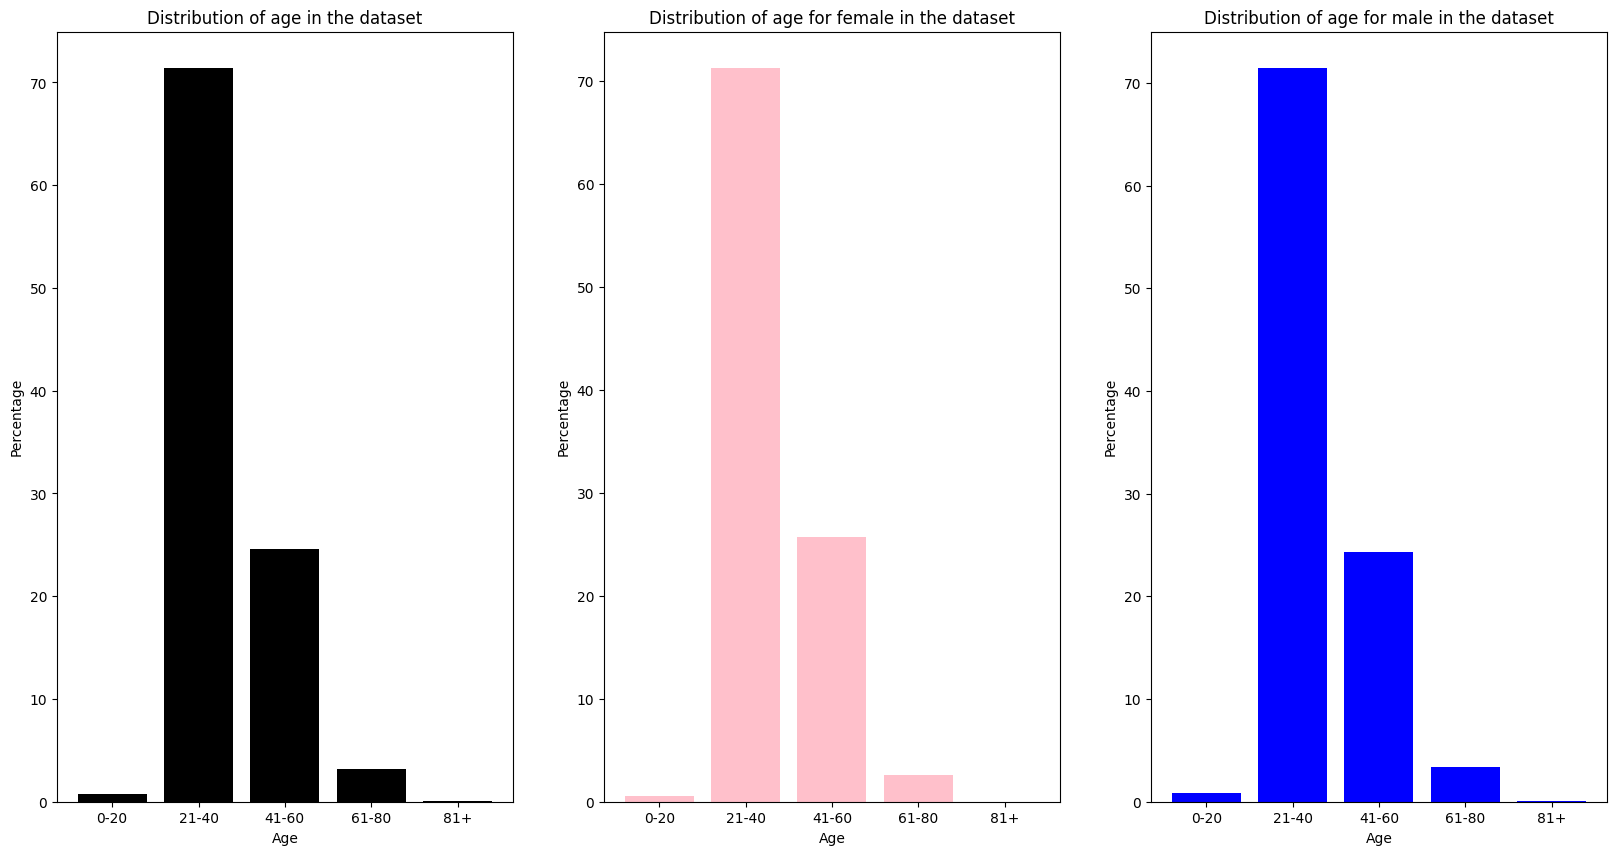

In [85]:
#grouped by 20 years gap
bins = [0, 20, 40, 60, 80, float('inf')]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']

df_glob['age_group'] = pd.cut(df_glob['age'], bins=bins, labels=labels, right=False)

age_counts = df_glob['age_group'].value_counts().sort_index()
age_percentage = (age_counts/age_counts.sum())*100
age_sex_counts = df_glob.groupby(['sex', 'age_group']).size().unstack('sex', fill_value=0)
age_sex_percentage = (age_sex_counts/age_sex_counts.sum())*100
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.bar(age_counts.index, age_percentage, color = 'black')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title("Distribution of age in the dataset")
plt.subplot(1, 3, 2)
plt.bar(age_sex_counts.index, age_sex_percentage['Female'],color='pink')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title("Distribution of age for female in the dataset")
plt.subplot(1, 3, 3)
plt.bar(age_sex_counts.index, age_sex_percentage['Male'],color='blue')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title("Distribution of age for male in the dataset")
plt.show()

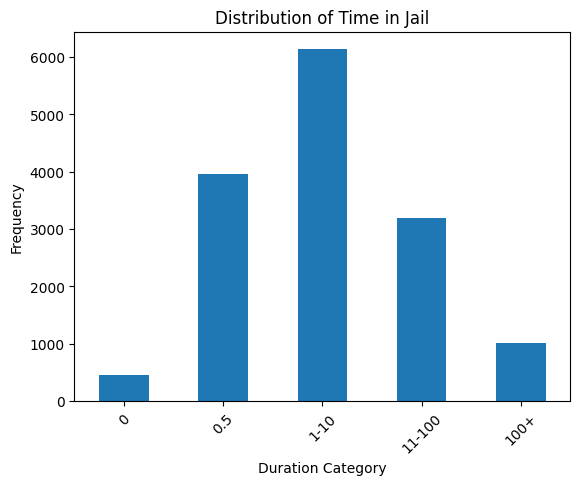

In [86]:
bins = [0, 0.5, 1, 10, 100, float('inf')]
labels = ['0', '0.5', '1-10', '11-100', '100+']

df_glob['duration_cat'] = pd.cut(df_glob['duration'], bins=bins, labels=labels, right=False)
duration_counts = df_glob['duration_cat'].value_counts().sort_index()

duration_counts.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Frequency')
plt.title('Distribution of Time in Jail')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\2948894840.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



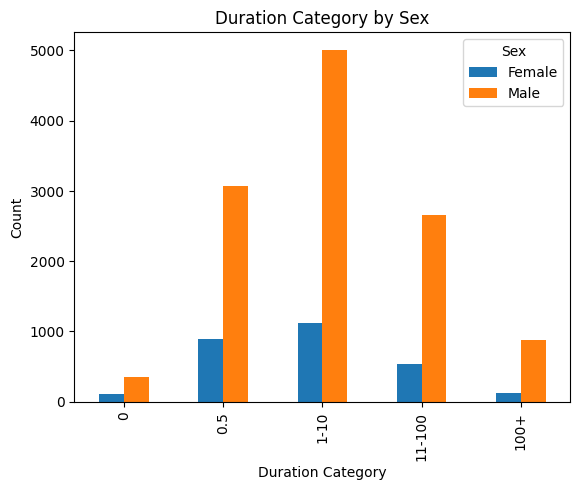

In [87]:
duration_by_sex = df_glob.groupby(['duration_cat', 'sex']).size().unstack()

duration_by_sex.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Sex')
plt.legend(title='Sex')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\2157336528.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



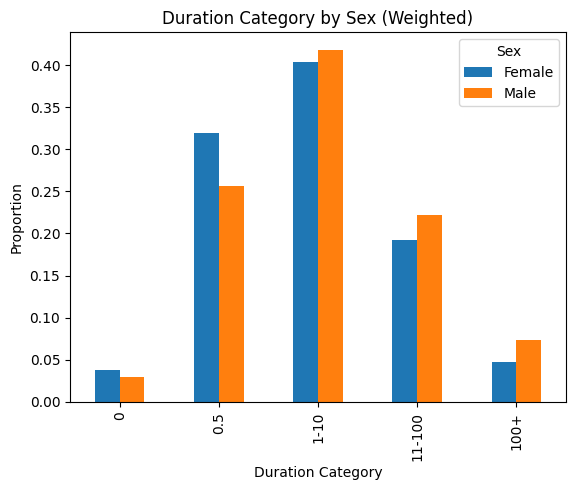

In [88]:
# Count the total number of men and women
total_men = (df_glob['sex'] == 'Male').sum()
total_women = (df_glob['sex'] == 'Female').sum()

# Count occurrences of each duration category by sex
duration_by_sex = df_glob.groupby(['duration_cat', 'sex']).size().unstack()

# Calculate proportions by dividing by total number of men and women
duration_by_sex['Male'] /= total_men
duration_by_sex['Female'] /= total_women

# Plot duration category by sex with weighted proportions
duration_by_sex.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Proportion')
plt.title('Duration Category by Sex (Weighted)')
plt.legend(title='Sex')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\2727541797.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



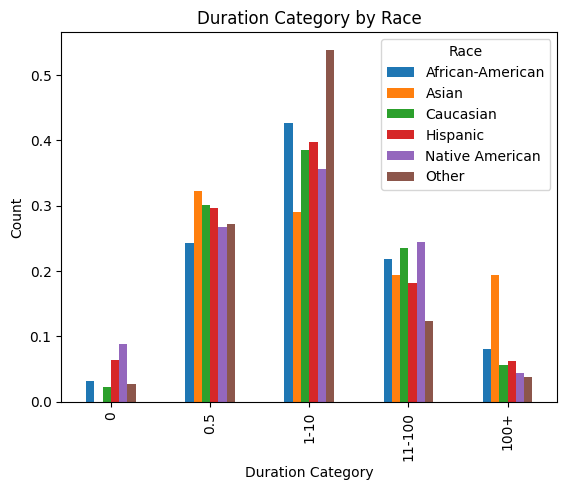

In [89]:
duration_by_race = df_glob.groupby(['duration_cat', 'race']).size().unstack()

duration_by_race['African-American'] /= df_glob['race'].value_counts()['African-American']
duration_by_race['Caucasian'] /= df_glob['race'].value_counts()['Caucasian']
duration_by_race['Hispanic'] /= df_glob['race'].value_counts()['Hispanic']
duration_by_race['Other'] /= df_glob['race'].value_counts()['Other']
duration_by_race['Asian'] /= df_glob['race'].value_counts()['Asian']
duration_by_race['Native American'] /= df_glob['race'].value_counts()['Native American']
duration_by_race.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Race')
plt.legend(title='Race')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\500921139.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



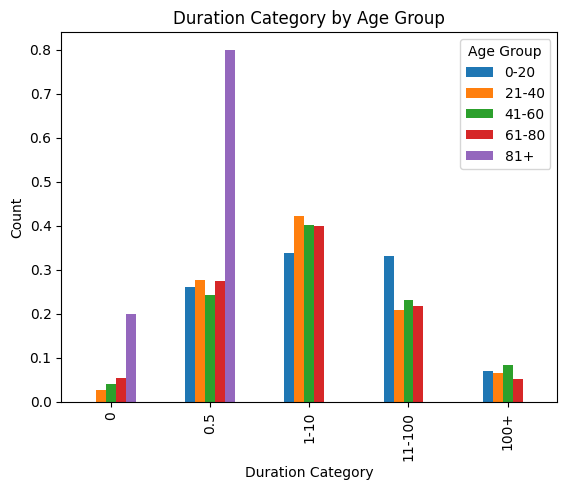

In [90]:
duration_by_age = df_glob.groupby(['duration_cat', 'age_group']).size().unstack()

duration_by_age['0-20'] /= df_glob['age_group'].value_counts()['0-20']
duration_by_age['21-40'] /= df_glob['age_group'].value_counts()['21-40']
duration_by_age['41-60'] /= df_glob['age_group'].value_counts()['41-60']
duration_by_age['61-80'] /= df_glob['age_group'].value_counts()['61-80']
duration_by_age['81+'] /= df_glob['age_group'].value_counts()['81+']

duration_by_age.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Age Group')
plt.legend(title='Age Group')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\2298447252.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



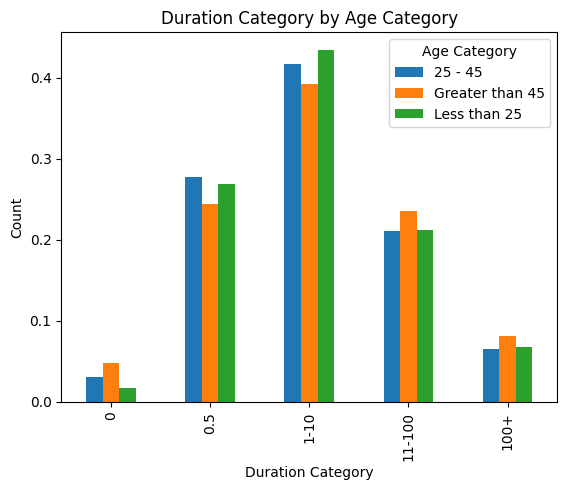

In [91]:
duration_by_age_cat = df_glob.groupby(['duration_cat', 'age_cat']).size().unstack()

duration_by_age_cat['Less than 25'] /= df_glob['age_cat'].value_counts()['Less than 25']
duration_by_age_cat['25 - 45'] /= df_glob['age_cat'].value_counts()['25 - 45']
duration_by_age_cat['Greater than 45'] /= df_glob['age_cat'].value_counts()['Greater than 45']

duration_by_age_cat.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Age Category')
plt.legend(title='Age Category')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\2565858950.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



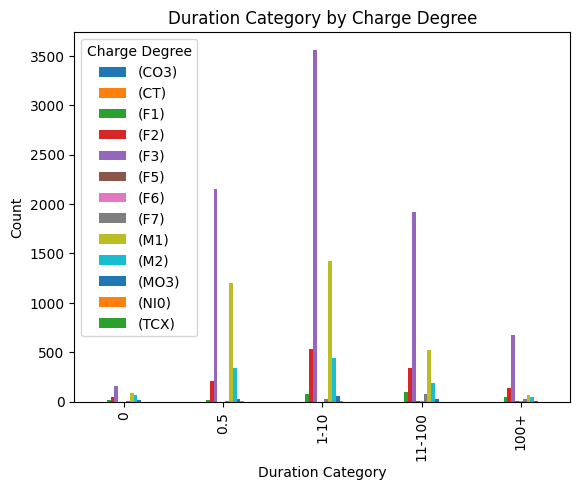

In [92]:
duration_by_degree = df_glob.groupby(['duration_cat', 'c_charge_degree']).size().unstack()

duration_by_degree.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Charge Degree')
plt.legend(title='Charge Degree')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_20308\2565858950.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



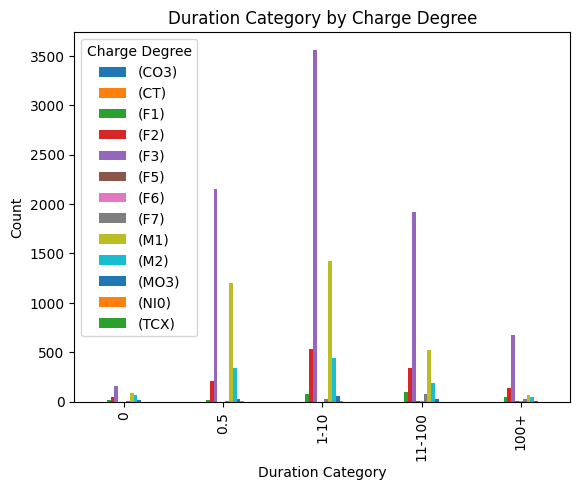

In [93]:
duration_by_degree = df_glob.groupby(['duration_cat', 'c_charge_degree']).size().unstack()

duration_by_degree.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Charge Degree')
plt.legend(title='Charge Degree')
plt.show()

In [94]:
df_glob['recidivism'] = df['is_recid'] | df['is_violent_recid']
df_glob

,name,sex,age,age_cat,race,decile_score,priors_count,c_charge_degree,is_recid,r_charge_degree,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration,age_group,duration_cat,recidivism
0,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5,61-80,0.5,0
1,miguel hernandez,Male,69,Greater than 45,Other,1,0,(F3),0,NaN,NaN,0,NaN,0,0.5,61-80,0.5,0
3,kevon dixon,Male,34,25 - 45,African-American,3,0,(F3),1,(F3),NaN,1,(F3),1,10.5,21-40,11-100,1
4,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5,21-40,1-10,1
5,ed philo,Male,24,Less than 25,African-American,4,4,(F3),1,(M1),0.0,0,NaN,0,1.5,21-40,1-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,malcolm simmons,Male,23,Less than 25,African-American,3,0,(F3),0,NaN,NaN,0,NaN,0,1.5,21-40,1-10,0
15509,alexsandra beauchamps,Female,31,25 - 45,African-American,6,5,(M1),0,NaN,NaN,0,NaN,0,10.5,21-40,11-100,0
15510,winston gregory,Male,57,Greater than 45,Other,1,0,(F2),0,NaN,NaN,0,NaN,0,1.5,41-60,1-10,0
15511,farrah jean,Female,33,25 - 45,African-American,2,3,(M1),0,NaN,NaN,0,NaN,0,1.5,21-40,1-10,0


<Axes: >

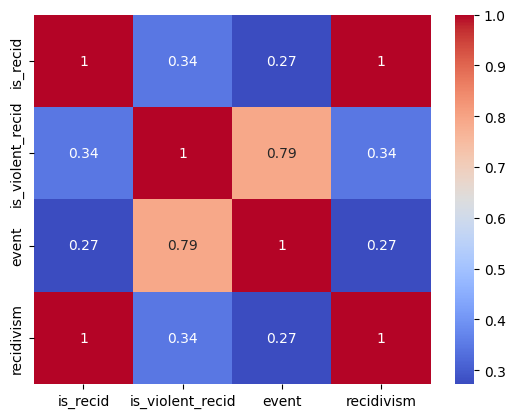

In [95]:
df_recid = df_glob.loc[:, ['is_recid', 'is_violent_recid', 'event', 'recidivism']]
df_corr = df_recid.corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm')

In [96]:
charge_descriptions_by_degree = {
    degree: df[df['c_charge_degree'] == degree]['c_charge_desc'].unique().tolist()
    for degree in df['c_charge_degree'].unique()
}

charge_descriptions_by_degree

{'(F3)': ['Aggravated Assault w/Firearm',
  'Felony Battery w/Prior Convict',
  'Possession of Cocaine',
  'Possession of Cannabis',
  'Possession Burglary Tools',
  'arrest case no charge',
  'Possession Of Alprazolam',
  'Poss 3,4 MDMA (Ecstasy)',
  'Poss3,4 Methylenedioxymethcath',
  'Felony Driving While Lic Suspd',
  'Grand Theft in the 3rd Degree',
  'Driving While License Revoked',
  'Possession Of Heroin',
  'Battery on Law Enforc Officer',
  'Introduce Contraband Into Jail',
  'Poss Pyrrolidinovalerophenone',
  'Lewd/Lasc Battery Pers 12+/<16',
  'Carrying Concealed Firearm',
  'Pos Cannabis W/Intent Sel/Del',
  'Tampering With Physical Evidence',
  'Att Tamper w/Physical Evidence',
  'Felony Petit Theft',
  'Burglary Structure Assault/Batt',
  'Fel Drive License Perm Revoke',
  'Agg Fleeing and Eluding',
  'Defrauding Innkeeper $300/More',
  'Uttering a Forged Instrument',
  'Possession of Oxycodone',
  'Grand Theft Dwell Property',
  'Poss Tetrahydrocannabinols',
  'Poss Fir

In [97]:
total_no_charge = df['c_charge_desc'].value_counts()['arrest case no charge']/df['c_charge_desc'].value_counts().sum()
print(f"Percentage of cases with no charge: {total_no_charge*100:.2f}%")

Percentage of cases with no charge: 17.66%


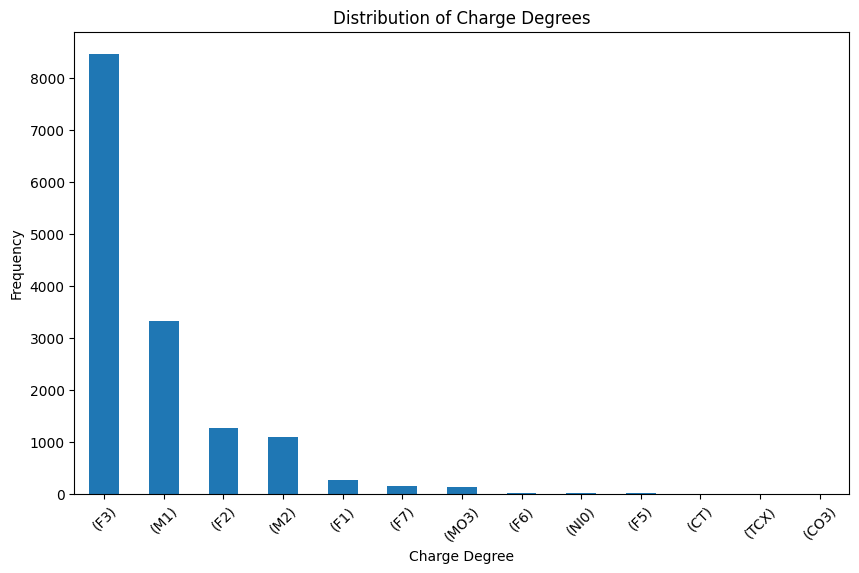

In [98]:
charge_degree_counts = df['c_charge_degree'].value_counts()

plt.figure(figsize=(10, 6))
charge_degree_counts.plot(kind='bar')
plt.title('Distribution of Charge Degrees')
plt.xlabel('Charge Degree')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

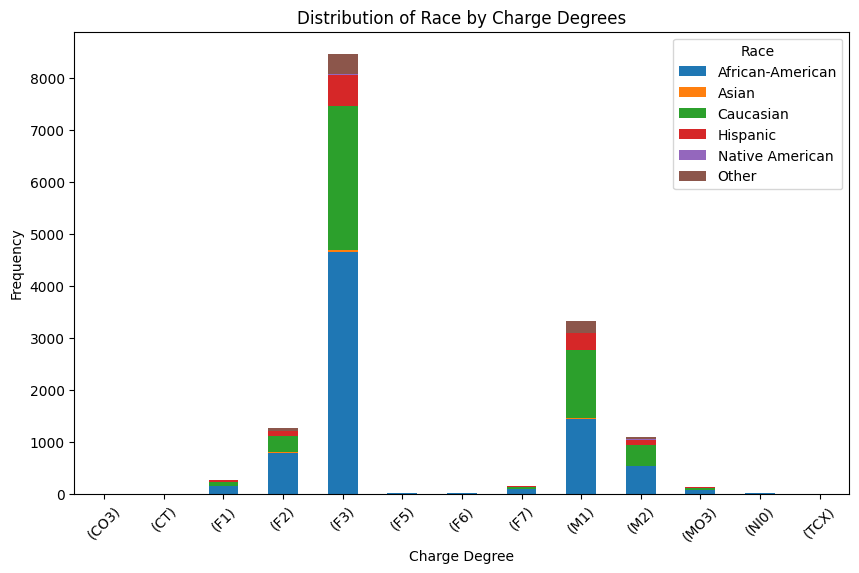

In [99]:
charge_degree_by_race = df.groupby('c_charge_degree')['race'].value_counts().unstack(fill_value=0)

# Plot the distribution
charge_degree_by_race.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Race by Charge Degrees')
plt.xlabel('Charge Degree')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()

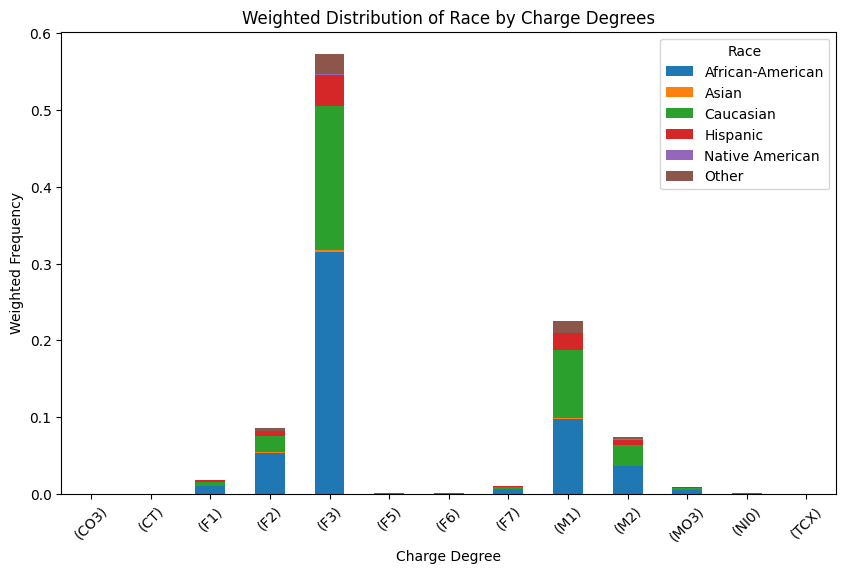

In [100]:
charge_degree_proportions = df.groupby(['c_charge_degree', 'race']).size() / len(df)

# Reshape the DataFrame to have charge degrees as columns and races as rows
charge_degree_by_race = charge_degree_proportions.unstack(level='race').fillna(0)

# Plot the weighted distribution
charge_degree_by_race.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Weighted Distribution of Race by Charge Degrees')
plt.xlabel('Charge Degree')
plt.ylabel('Weighted Frequency')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()